# Marketing Analytics: Predicting Customer Churn in Python

Customer Churn: When an existing returning client stops doing business or ends a relationship with a company

**Contractual churn**
When customers are under a contract and decide to cancel their service

**Voluntary churn**
Actively cancelling a service

**Non-contractual churn**
Example: consumer loyalty / online browsing

**Involuntary churn**
Example: Credit Card expiration

# Summary statistics for both classes
Consider the following .groupby() code:

`# Group by x and compute the standard deviation
df.groupby(['x']).std()`

Here, a DataFrame df is grouped by a column 'x', and then the standard deviation is calculated across all columns of df for each value of 'x'. The .groupby() method is incredibly useful when you want to investigate specific columns of your dataset. Here, you're going to explore the 'Churn' column further to see if there are differences between churners and non-churners. A subset version of the telco DataFrame, consisting of the columns 'Churn', 'CustServ_Calls', and 'Vmail_Message' is available in your workspace.

If you need a refresher on how .groupby() works, please refer back to the pre-requisite Manipulating DataFrames with pandas course.

```python
# Group telco by 'Churn' and compute the mean
print(telco.groupby(['Churn']).mean())

# Adapt your code to compute the standard deviation
print(telco.groupby(['Churn']).std())
```

# Churn by State
When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not. You may have noticed that there is a 'State' column in the dataset. In this exercise, you'll group 'State' and 'Churn' to count the number of churners and non-churners by state. For example, if you wanted to group by x and aggregate by y, you could use .groupby() as follows:

`df.groupby('x')['y'].value_counts()`

```python
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())
```

# Exploring feature distributions
You saw in the video that the 'Account_Length' feature was normally distributed. Let's now visualize the distributions of the following features using seaborn's distribution plot:

'Day_Mins'
'Eve_Mins'
'Night_Mins'
'Intl_Mins'
To create a feature's distribution plot, pass it in as an argument to sns.distplot(). The Telco dataset is available to you as a DataFrame called telco.

```python
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

# Display the plot
plt.show()


# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])

# Display the plot
plt.show()

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])

# Display the plot
plt.show()
```



# Customer service calls and churn
You've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans? Let's find out!

Recall the syntax for creating a box plot using seaborn:

`sns.boxplot(x = "X-axis variable",
            y = "Y-axis variable",
            data = DataFrame)`
            
If you want to remove outliers, you can specify the additional parameter sym="", and you can add a third variable using hue.

```python
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

# Display the plot
plt.show()

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()
```

# Encoding binary features
Recasting data types is an important part of data preprocessing. In this exercise you will assign the values 1 to 'yes' and 0 to 'no' to the 'Vmail_Plan' and 'Churn' features, respectively.

You saw two approaches to doing this in the video - one using pandas, and the other using scikit-learn. For straightforward tasks like this, sticking with pandas is recommended, so that's what we'll do in this exercise. If you're trying to build machine learning pipelines, on the other hand - which is beyond the scope of this course - you can explore using LabelEncoder(). When doing data science, it's important to be aware that there is always more than one way to accomplish a task, and you need to pick the one that is most effective for your application.

```python
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].map({'yes':1,'no':0})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].map({'yes':1,'no':0})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())
```

# One hot encoding
In the video, you saw how the 'State' feature can be encoded numerically using the technique of one hot encoding:

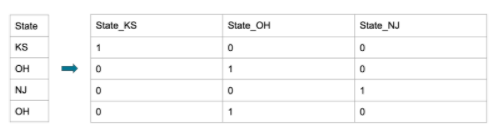

Doing this manually would be quite tedious, especially when you have 50 states and over 3000 customers! Fortunately, pandas has a get_dummies() function which automatically applies one hot encoding over the selected feature.

```python
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())
```

# Feature scaling
Recall from the video the different scales of the 'Intl_Calls' and 'Night_Mins' features:

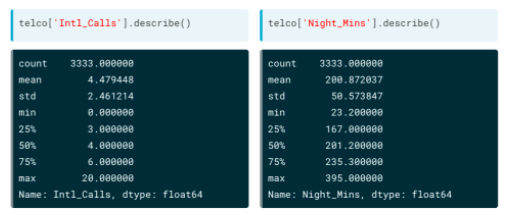

Your job in this exercise is to re-scale them using StandardScaler.

In your workspace, the telco DataFrame has been subset to only include the features you want to rescale: 'Intl_Calls' and 'Night_Mins'. To apply StandardScaler, you need to first instantiate it using StandardScaler(), and then apply the fit_transform() method, passing in the DataFrame you want to rescale. You can do this in one line of code:

StandardScaler().fit_transform(df)

```python
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())
```

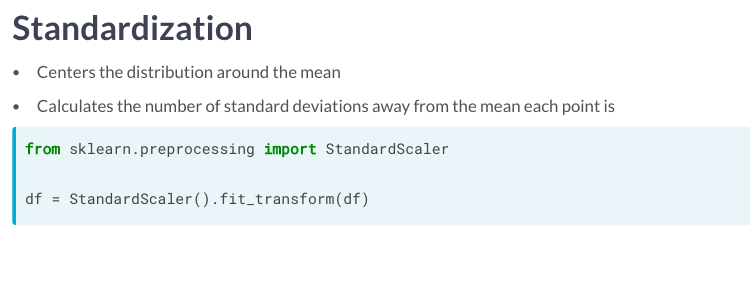

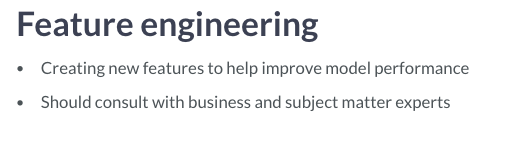

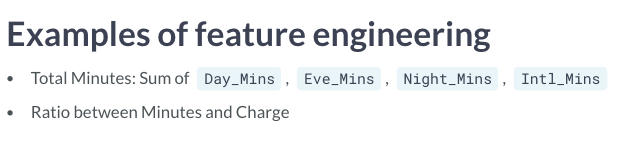

# Dropping unnecessary features
Some features such as 'Area_Code' and 'Phone' are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling. The easiest way to do so in Python is using the .drop() method of pandas DataFrames, just as you saw in the video, where 'Soc_Sec' and 'Tax_ID' were dropped:

telco.drop(['Soc_Sec', 'Tax_ID'], axis=1)
Here, axis=1 indicates that you want to drop 'Soc_Sec' and 'Tax_ID' from the columns.

```python
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)
```

# Engineering a new column
Leveraging domain knowledge to engineer new features is an essential part of modeling. This quote from Andrew Ng summarizes the importance of feature engineering:

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.

Your job in this exercise is to create a new feature that contains information about the average length of night calls made by customers.

```python
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())
```

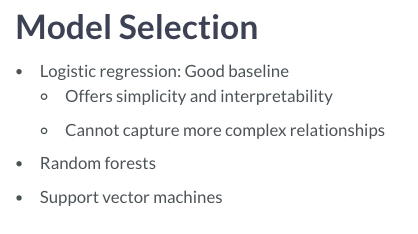

# Predicting whether a new customer will churn
As you saw in the video, to train a model using sklearn:

Import the model of interest - here, a Support Vector Classifier:
`from sklearn.svm import SVC`
Instantiate it:
`svc = SVC()`
Train it, or "fit it", to the data:
`svc.fit(telco['data'], telco['target'])`
Here, the first argument consists of the features, while the second argument is the label that we are trying to predict - whether or not the customer will churn. After you've fitted the model, you can use the model's `.predict()` method to predict the label of a new customer.

This process is true no matter which model you use, and sklearn has many! In this exercise, you'll use LogisticRegression.

```python
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))
```

# Training another scikit-learn model
All sklearn models have .fit() and .predict() methods like the one you used in the previous exercise for the LogisticRegression model. This feature allows you to easily try many different models to see which one gives you the best performance. To get you more confident with using the sklearn API, in this exercise you'll try fitting a DecisionTreeClassifier instead of a LogisticRegression.

```python
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))
```

# Creating training and test sets
Before you create any model, it is important to split your dataset into two: a training set which will be used to build your churn model, and a test set which will be used to validate your model. To do this, you can use the train_test_split() function from sklearn.model_selection.

You'll practice creating training and test sets in this exercise. The telco DataFrame is available in your workspace.

```python
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
```

# Computing accuracy
Having split your data into training and testing sets, you can now fit your model to the training data and then predict the labels of the test data. That's what you'll practice doing in this exercise.

So far, you've used Logistic Regression and Decision Trees. Here, you'll use a RandomForestClassifier, which you can think of as an ensemble of Decision Trees that generally outperforms a single Decision Tree.

Your work in the previous exercises has carried over, and the training and test sets are available in the variables X_train, X_test, y_train, and y_test.
```python
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))
```

# Confusion Matrix

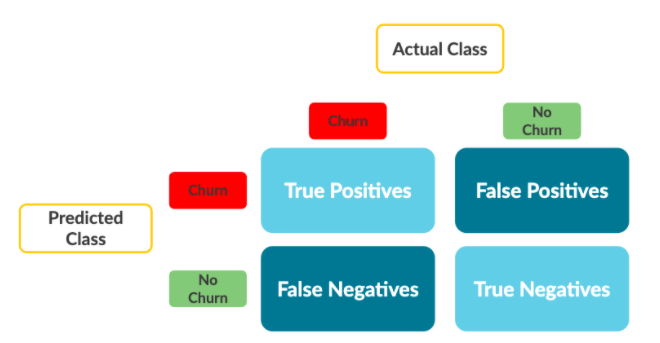

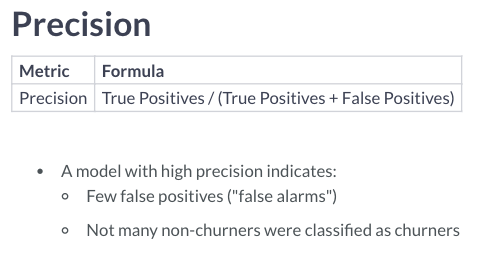

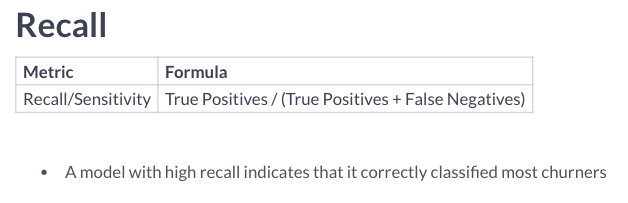

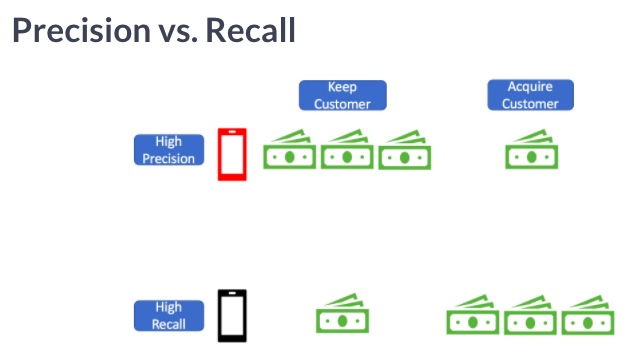

### If the offer you make to keep potential churners is high in relation to the value of losing customers you want your model to have high precision (minimize false positives) 

### If losing customers you didn't think would churn is more expensive than an offer to keep a customer that would not have churned we want a high recall (minimize false negatives) 

# Confusion matrix
Using scikit-learn's confusion_matrix() function, you can easily create your classifier's confusion matrix and gain a more nuanced understanding of its performance. It takes in two arguments: The actual labels of your test set - y_test - and your predicted labels.

The predicted labels of your Random Forest classifier from the previous exercise are stored in y_pred and were computed as follows:

`y_pred = clf.predict(X_test)`
Important note: sklearn, by default, computes the confusion matrix as follows:

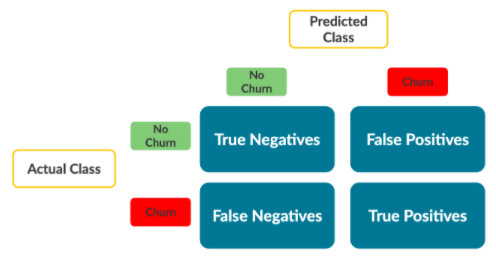

Notice that the axes are the opposite of what you saw in the video. The metrics themselves remain the same, but keep this in mind when interpreting the table.

```python
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
```

# Varying training set size
The size of your training and testing sets influences model performance. Models learn better when they have more training data. However, there's a risk that they overfit to the training data and don't generalize well to new data, so in order to properly evaluate the model's ability to generalize, you need enough testing data. As a result, there is a important balance and trade-off involved between how much you use for training and how much you hold for testing.

So far, you've used 70% for training and 30% for testing. Let's now use 80% of the data for training and evaluate how that changes the model's performance.

```python
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
```

# Computing precision and recall
The sklearn.metrics submodule has many functions that allow you to easily calculate interesting metrics. So far, you've calculated precision and recall by hand - this is important while you develop your intuition for both these metrics.

In practice, once you do, you can leverage the precision_score and recall_score functions that automatically compute precision and recall, respectively. Both work similarly to other functions in sklearn.metrics - they accept 2 arguments: the first is the actual labels (y_test), and the second is the predicted labels (y_pred).

Let's now try a training size of 90%.

```python
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import precision_score

# Print the recall
print(precision_score(y_test, y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))
```

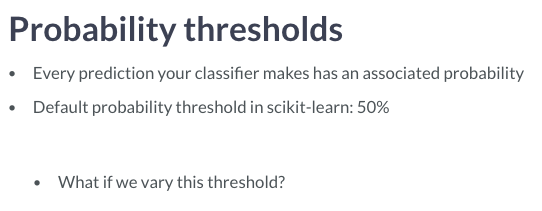

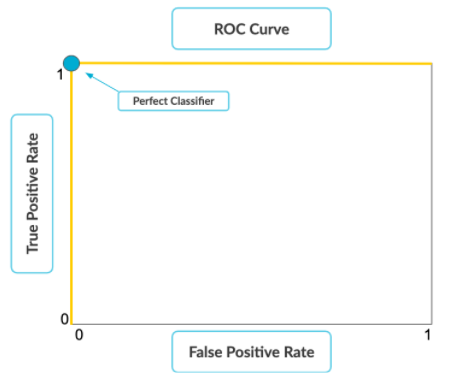

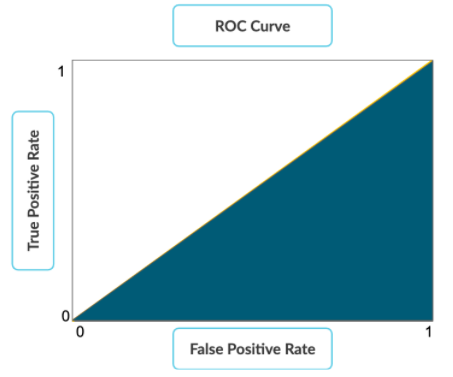

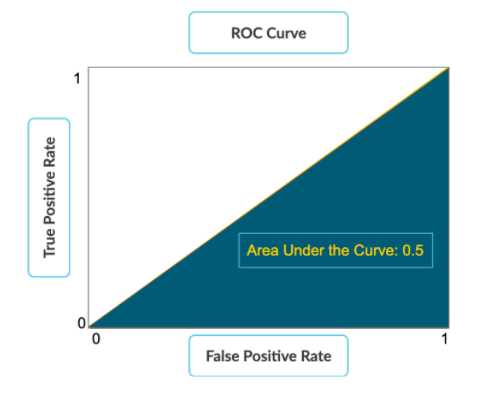

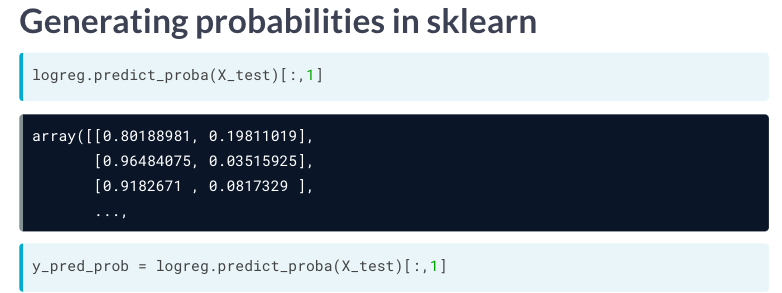

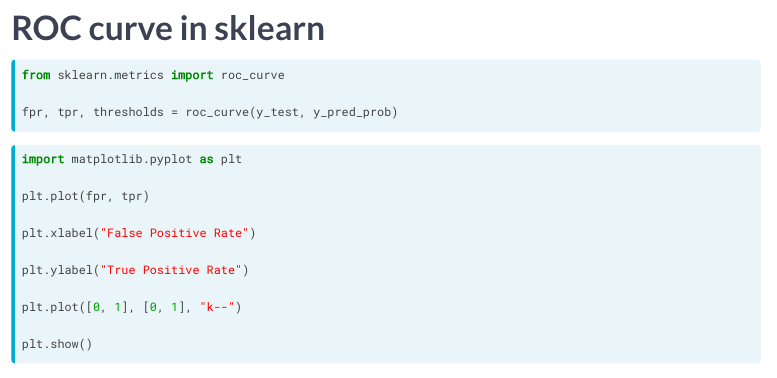

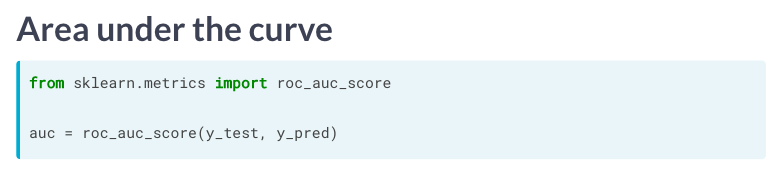

# ROC curve
Let's now create an ROC curve for our random forest classifier. The first step is to calculate the predicted probabilities output by the classifier for each label using its .predict_proba() method. Then, you can use the roc_curve function from sklearn.metrics to compute the false positive rate and true positive rate, which you can then plot using matplotlib.

A RandomForestClassifier with a training set size of 70% has been fit to the data and is available in your workspace as clf.

```python
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
```

# Area under the curve
The ROC curve from the previous exercise is viewable on the right. Visually, it looks like a well-performing model. Let's quantify this by computing the area under the curve.

```python
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))
```

# Precision-recall curve
Another way to evaluate model performance is using a precision-recall curve, which shows the tradeoff between precision and recall for different thresholds.

On the right, a precision-recall curve has been generated. Spend some time studying it and then select the statement below that is not true.

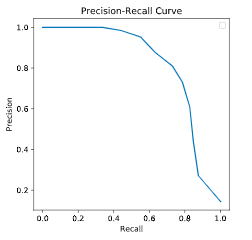

* This curves summarize the tradeoff between the true positive rate and the positive predictive value.
* A high area under the curve represents both high recall and high precision.
* **Recall is synonymous with specificity, and precision is identical with positive predictive value.**
* Precision-recall curves tend to be more informative when you have imbalanced classes.

**Recall is actually synonymous with sensitivity.**

# F1 score

As you've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

`2 * (precision * recall) / (precision + recall)`

The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. In scikit-learn, you can compute the f-1 score using using the f1_score function.

```python
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))
```

# Tuning the number of features

The default hyperparameters used by your models are not optimized for your data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance. In the video, you saw how the random forest's n_estimators hyperparameter was tuned. Here, you'll practice tuning the max_features hyperparameter.

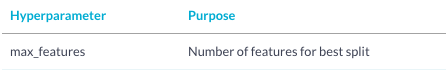

A random forest is an ensemble of many decision trees. The n_estimators hyperparameter controls the number of trees to use in the forest, while the max_features hyperparameter controls the number features the random forest should consider when looking for the best split at decision tree.

A random forest classifier has been instantiated for you as clf.

```python
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)
```

# Tuning other hyperparameters
The power of GridSearchCV really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination. Here, you'll tune the following random forest hyperparameters:

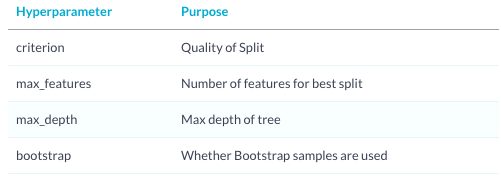

```python
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)
```

# Randomized search
```python
# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)
```
In the above chunk of code from the previous exercise, you may have noticed that the first line of code did not take much time to run, while the call to .fit() took several seconds to execute.

This is because .fit() is what actually performs the grid search, and in our case, it was grid with many different combinations. As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In scikit-learn, you can do this using RandomizedSearchCV. It has the same API as GridSearchCV, except that you need to specify a parameter distribution that it can sample from instead of specific hyperparameter values. Let's try it out now! The parameter distribution has been set up for you, along with a random forest classifier called clf.

```python
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)
```

# Visualizing feature importances
Your random forest classifier from earlier exercises has been fit to the telco data and is available to you as clf. Let's visualize the feature importances and get a sense for what the drivers of churn are, using matplotlib's barh to create a horizontal bar plot of feature importances.

```python
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()
```

# Improving the plot
In order to make the plot more readable, we need to do achieve two goals:

Re-order the bars in ascending order.
Add labels to the plot that correspond to the feature names.
To do this, we'll take advantage of NumPy indexing. The .argsort() method sorts an array and returns the indices. We'll use these indices to achieve both goals.

```python
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()
```

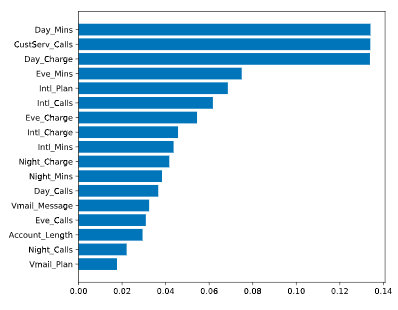

# Does model performance improve?
6 new features have been added to the telco DataFrame:

* Region_Code
* Cost_Call
* Total_Charge
* Total_Minutes
* Total_Calls
* Min_Call

Will this improve the churn model? Let's find out!

```python
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test, y_test))
```

# Computing other metrics
In addition to accuracy, let's also compute the F1 score of this new model to get a better picture of model performance.

A 70-30 train-test split has already been done for you, and all necessary modules have been imported.

```python
# Import f1_score
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the F1 score
print(f1_score(y_test, y_pred))
```